### Trabalho Prático do Módulo 1 - IGTI Bootcamp Analista de Dados


### Instruções
#### Objetivos

##### Exercitar os seguintes conceitos trabalhados no Módulo 1:

* Uso do Google Colab
* Uso do Power BI
* Algoritmo K-Means

#### Enunciado

Para as questões de 1 a 7 trabalharemos com python e o algoritmo K-Means. Serão fornecidos alguns trechos de código para auxiliar na execução. Considere um dataset gerado pelo seguinte comando:

```make_blobs(n_samples=500, centers=20, random_state=999)```

Ao executar o algoritmo K-Means, considere os parâmetros:

* ```init = k-means++```
* ```max_iter = 300```
* ```n_init = 10```


Para as questões de 8 a 12, instale o Power BI Desktop e baixe o dataset <a herf="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv">Novel Corona Virus 2019</a> e carregue os dados no Power BI. Atenção aos tipos de dados de cada coluna. Crie uma nova medida chamada “Active” para calcular o número de casos ativos, que é no caso é o valor da coluna “Confirmed” menos a soma das colunas “Recovered” e “Deaths”. Crie gráficos para facilitar a sua visualização, de acordo com a questão.

#### Respostas Finais

 Os alunos deverão desenvolver a prática e, depois, responder às seguintes questões objetivas:

#### Importação das Bibliotecas necessárias

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from IPython.display import Image
import math

### Questão 1

Qual o objetivo do algoritmo K-Means?
* R: Clusterização 

### Questão 2

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [8]:
dataset, y = make_blobs(n_samples=500, centers=20, random_state=999)

In [20]:
wcss = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10)
    kmeans.fit_predict(dataset)
    wcss.append(kmeans.inertia_)

In [24]:
wcss[-1]

4717.404091931214

### Questão 3

Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com a medida “Active”, apenas para a Itália (Italy), como fica o gráfico?

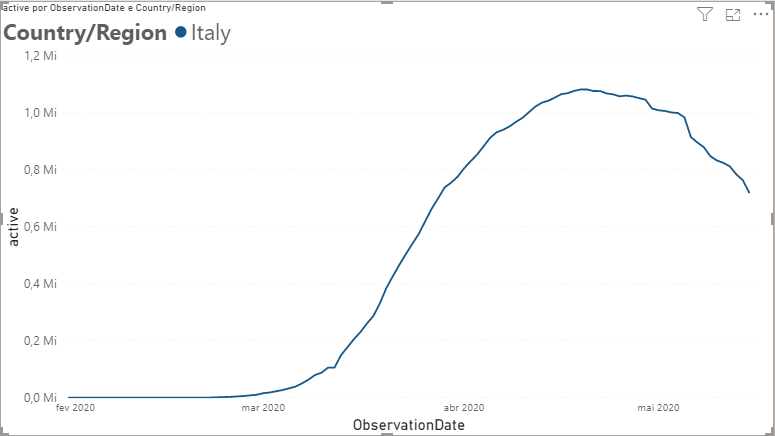

In [4]:
Image("Apoio/questao-3.png")

### Questão 4

Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com as medidas “Confirmed”, “Deaths”, “Recovered” e “Active” apenas para a China (Mainland China), como fica o gráfico?

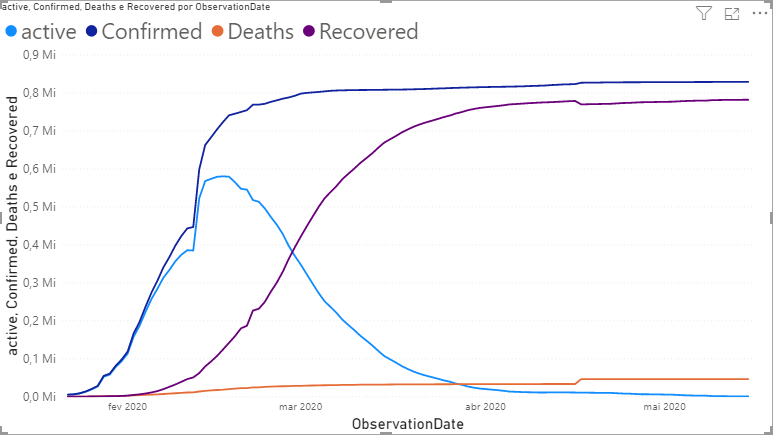

In [38]:
Image("Apoio/questao-4.png")

### Questão 5

Utilize o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Itália (Italy). Analise as informações do dataset e responda: em que mês a Itália passou a ter mais casos recuperados do que casos ativos?

* R: Maio


### Questão 6

Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto?

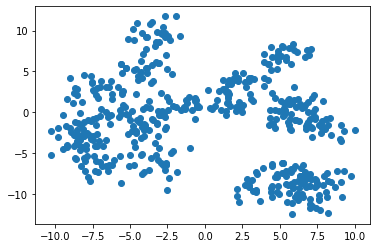

In [13]:
plt.scatter(dataset[:,0],dataset[:,1])

### Questão 7

Considere o dataset gerado a partir das instruções do enunciado. Qual o número ideal de clusters?

Para que possamos encontrar o cluster ideal vou usar o método do cotovelo e como apoio foi usado o material desta [publicação](https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9).

In [29]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10)
    kmeans.fit_predict(dataset)
    wcss.append(kmeans.inertia_)

In [30]:
wcss

[31547.372471390485,
 16949.214472147927,
 9464.847250570496,
 6005.101775346179,
 4717.404091931214,
 3662.6403286096665,
 2974.7988616060043,
 2502.577079970675,
 2050.2071307551255,
 1841.2628557470243]

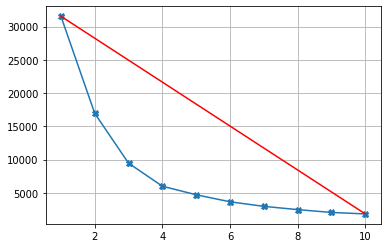

In [69]:
plt.plot(range(1,11), wcss, marker='X')
plt.plot([1,10], [wcss[0],wcss[9]], c='red')
plt.grid()
plt.show()

In [31]:
x1, y1 = 1, wcss[0]
x2, y2 = 10, wcss[-1]

distances = []
for i in range(len(wcss)):
    x0 = i+1
    y0 = wcss[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)
distances

[2.755477592385971e-16,
 3.422774271913953,
 4.690297826416671,
 4.738489919363049,
 4.128621112311314,
 3.4481807894417464,
 2.6565747650370444,
 1.7996428832797318,
 0.93669653224691,
 2.755477592385971e-16]

In [32]:
distances.index(max(distances)) + 1

4

### Questão 8

Utilize o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Coreia do Sul (South Korea). Em que mês esse país atingiu o pico de casos ativos?


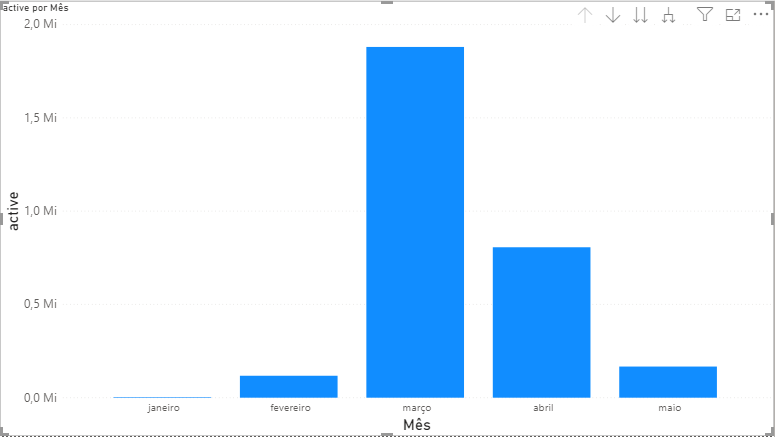

In [35]:
Image("Apoio/questao-8.png")

### Questão 9

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?

In [73]:
kmeans = KMeans(n_clusters=1, init="k-means++", max_iter=300, n_init=10)
kmeans.fit_predict(dataset)
kmeans.cluster_centers_

array([[ 0.02618523, -1.30384304]])

### Questão 10

O algoritmo K-Means é baseado em qual tipo de aprendizagem?

* R: Não Supervisionado

### Questão 11

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [74]:
kmeans = KMeans(n_clusters=1, init="k-means++", max_iter=300, n_init=10)
kmeans.fit_predict(dataset)
kmeans.inertia_

31547.372471390485

### Questão 12

Utilize o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Venezuela, analise as informações, perceba que algumas vezes o número de casos recuperados foi maior que o de casos ativos. Em que mês isso ocorreu pela primeira vez?

* R: Abril 


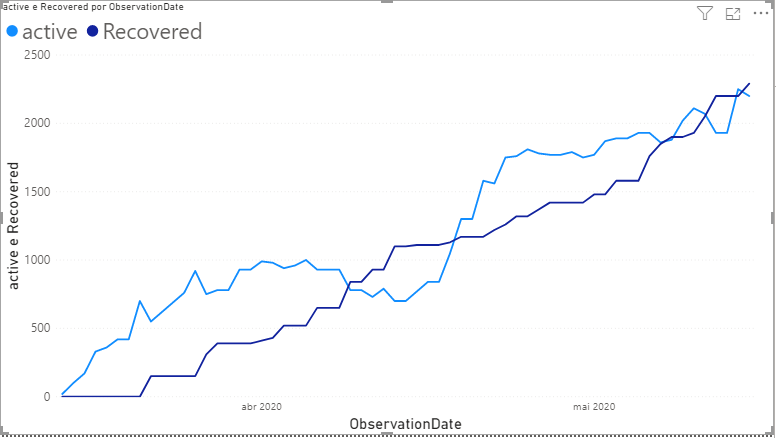

In [39]:
Image("Apoio/questao-12.png")